# Preparing COSMOS shape catalog

In this notebook, we prepare the full (with both bright and faint galaxies) COSMOS shape catalog using 
weak lensing measurements from [Schrabback et al. 2010](https://ui.adsabs.harvard.edu/abs/2010A%26A...516A..63S/abstract).

Most important catalog's columns described in Tim's README:
-   1 Ra                  
-   2 Dec                 
-   3 Xs                  Mosaic X-Y coordinates (North up, East left)
-   4 Ys                  with pixel scale 0.186''. Can directly be used with      e1iso_snCal_rot4  e2iso_snCal_rot4            
-   5 MAG_AUTO            Kron-like elliptical aperture magnitude         [mag]   
-   6 e1iso_rot4_gr_snCal BEST gamma1-estimate for North=up  all fixes included   
-   7 e2iso_rot4_gr_snCal BEST gamma2-estimate for North=up  all fixes included
-  12 nhweight_int        shear-measurement weight (similar to Hoekstra et al.)
-  21 zphot               best-fit photoz estimate
-  37 z_problem           Potentially high redshift (zphot<0.6, MAG_AUTO>24)                                              0=fine, 1=bad (i>24), 2=verybad (i>24, zphot_sec>0)                    
For a proper redshift calibration you probably want to select z_problem=0
or z_problem<=1 (in the latter case you only exclude those galaxies
with a sig. secondary redshift peak, which is probably sufficient).

## Load lensing data

**Loading catalog with bright galaxies**

In [1]:
%pylab inline
from astropy.table import Table
from astropy.io import fits

cat_bright = Table.read('../../data/COSMOS/cosmos_bright_cat.asc', format='ascii')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Times"]})

**Loading catalog with faint galaxies**

In [3]:
cat_faint = Table.read('../../data/COSMOS/z_cos30/cosmos_faint_cat.asc', format='ascii')

Redshift distrubtion of faint galaxies

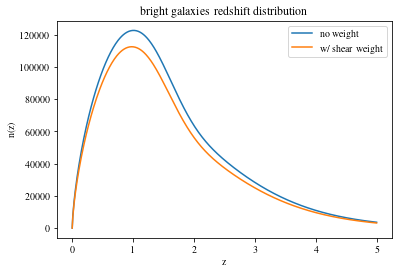

In [4]:
nz_w0 = Table.read('../../data/COSMOS/z_cos30/cosmos_zdist_faint_w0.asc', format='ascii')
nz_w1 = Table.read('../../data/COSMOS/z_cos30/cosmos_zdist_faint_w1.asc', format='ascii')

plot(nz_w0['col1'], nz_w0['col2'], label='no weight')
plot(nz_w1['col1'], nz_w1['col2'], label='w/ shear weight')
xlabel('z')
ylabel('n(z)')
legend()
title('bright galaxies redshift distribution');

In [5]:
# These show the borders of the cosmos field
COSMOS_VERTICES = [(149.508, 2.880),
                   (149.767, 2.836),
                   (149.780, 2.887),
                   (150.040, 2.842),
                   (150.051, 2.893),
                   (150.363, 2.840),
                   (150.376, 2.890),
                   (150.746, 2.826),
                   (150.737, 2.774),
                   (150.790, 2.765),
                   (150.734, 2.449),
                   (150.787, 2.441),
                   (150.730, 2.125),
                   (150.785, 2.118),
                   (150.758, 2.013),
                   (150.768, 2.010),
                   (150.747, 1.910),
                   (150.799, 1.897),
                   (150.740, 1.580),
                   (150.481, 1.625),
                   (150.466, 1.572),
                   (150.211, 1.619),
                   (150.196, 1.567),
                   (149.887, 1.621),
                   (149.872, 1.571),
                   (149.617, 1.615),
                   (149.602, 1.566),
                   (149.493, 1.584),
                   (149.504, 1.637),
                   (149.450, 1.646),
                   (149.488, 1.855),
                   (149.433, 1.862),
                   (149.491, 2.178),
                   (149.436, 2.186),
                   (149.484, 2.445),
                   (149.431, 2.455),
                   (149.508, 2.880)]

from lenspack.geometry.projections import gnom
def get_extend_radec(res, width):
    ra0, dec0 = (150.11, 2.24) # from cosmos.astro.caltech.edu (could also just use the medians of positions)
    proj = gnom.projector(ra0, dec0)
    pix_size = res #arcmin
    dx = np.deg2rad(width*pix_size/60./2) # number of degrees across
    dy = dx
    extent_xy = [-dx, dx, -dy, dy]
    ra_min, dec_min = proj.xy2radec(-dx, -dy)
    ra_max, dec_max = proj.xy2radec(dx, dy)
    extent_radec = [ra_min, ra_max, dec_min, dec_max]
    return extent_radec

## Apply necessary quality cuts

Discarding galaxies with redshift measurment problem

In [6]:
# We actually keep everything, only potentially high z galaxies
selection = ((cat_bright['z_problem'] == 0)
            )
# Restrict catalog to these objects
cat_bright = cat_bright[selection]

In [7]:
print(len(cat_bright))
print(len(cat_bright[cat_bright['zphot']<.6]))

165159
22294


In [8]:
cat_faint

Ra,Dec,Xs,Ys,MAG_AUTO,e1iso_rot4_gr_snCal,e2iso_rot4_gr_snCal,e1iso_rot1_gr_snCal,e2iso_rot1_gr_snCal,e1iso_snCal_rot4,e2iso_snCal_rot4,nhweight_int,rh,rg,next_dist,region,snratio,e1corr_rot,e2corr_rot
,,,,mag,,,,,,,"""""",pix,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
149.4962041,2.503671882,26145.1,19081.9,26.4293,-0.391807,-0.272931,-0.391832,-0.272929,-0.399523,-0.274931,1.10225,2.20677,2.40406,0.0005411530101,2,2.66054,0.00225615,0.0117953
149.4911655,2.475661482,26242.8,18539.8,26.3311,-0.189076,-0.353381,-0.189439,-0.353491,-0.194043,-0.358837,1.17029,2.05077,3.05287,0.001729526987,2,2.22021,-0.0112607,-0.00602251
149.4909315,2.478106282,26247.3,18587.1,26.5114,0.0380846,0.227643,0.0382676,0.22768,0.0343632,0.223223,1.44661,1.89814,2.08483,0.00125844029,2,2.99019,-0.0065375,-0.00571937
149.4878873,2.461363582,26306.3,18263.1,25.5171,0.169123,0.0239485,0.168921,0.0238937,0.166559,0.0202858,1.61848,2.93953,3.8789,0.0008095747274,2,3.45289,-0.00777161,-0.000112764
149.4948102,2.501864782,26172.1,19047.0,26.0895,0.191054,-0.179009,0.190253,-0.17922,0.183895,-0.181324,1.18971,3.46235,3.66476,0.001397124281,2,2.23109,-0.000866496,0.00405476
149.487688,2.464864782,26310.1,18330.8,25.6,0.0548855,-0.165406,0.0548638,-0.165417,0.0520573,-0.169887,1.24962,2.88601,3.04925,0.00148947164,2,4.61166,-0.00496776,-0.00219766
149.4898679,2.478661882,26267.8,18597.9,25.0974,0.0168497,0.0431876,0.0165013,0.0430837,0.0132595,0.03913,1.34808,4.41121,4.44719,0.00125844029,2,4.98742,-0.00174109,-0.00141766
149.4936679,2.500929182,26194.2,19028.9,25.6567,-0.691742,-0.031747,-0.692222,-0.0318734,-0.69769,-0.0339283,1.22114,3.16193,3.631,0.001104277824,2,3.55566,0.000515929,0.00328892


In [9]:
print(cat_bright.keys())

['Ra', 'Dec', 'Xs', 'Ys', 'MAG_AUTO', 'e1iso_rot4_gr_snCal', 'e2iso_rot4_gr_snCal', 'e1iso_rot1_gr_snCal', 'e2iso_rot1_gr_snCal', 'e1iso_snCal_rot4', 'e2iso_snCal_rot4', 'nhweight_int', 'rh', 'rg', 'next_dist', 'region', 'snratio', 'e1corr_rot', 'e2corr_rot', 'mod_gal', 'zphot', 'zerr_68_min', 'zerr_68_max', 'zerr_99_min', 'zerr_99_max', 'imag', 'chi_gal', 'zphot_sec', 'chi_sec', 'mod_sec', 'Mv', 'jmag', 'jmagerr', 'kmag', 'kmagerr', 'z_problem', 'LRG']


Text(0.5, 0, 'faint galaxies')

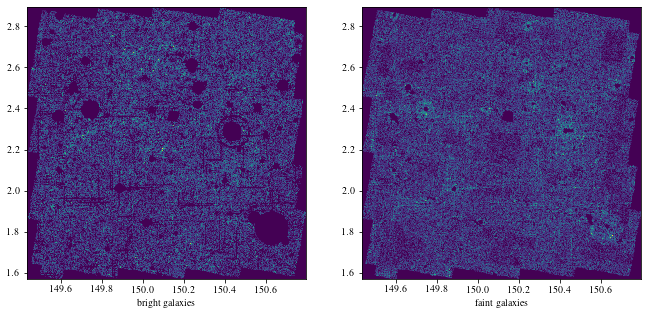

In [10]:
figure(figsize=(11, 5))
subplot(121)
xlabel("bright galaxies")
hist2d(cat_bright['Ra'], cat_bright['Dec'], 320)
subplot(122)
hist2d(cat_faint['Ra'], cat_faint['Dec'], 320)
xlabel("faint galaxies")

In [11]:
# merge catalog
cat_full = Table()
cat_full['Ra'] = np.concatenate([cat_bright['Ra'], cat_faint['Ra']])
cat_full['Dec'] = np.concatenate([cat_bright['Dec'], cat_faint['Dec']])
cat_full['e1iso_rot4_gr_snCal'] = np.concatenate([cat_bright['e1iso_rot4_gr_snCal'], cat_faint['e1iso_rot4_gr_snCal']])
cat_full['e2iso_rot4_gr_snCal'] = np.concatenate([cat_bright['e2iso_rot4_gr_snCal'], cat_faint['e2iso_rot4_gr_snCal']])
cat_full['nhweight_int'] = np.concatenate([cat_bright['nhweight_int'], cat_faint['nhweight_int']])

In [12]:
cat_full

Ra,Dec,e1iso_rot4_gr_snCal,e2iso_rot4_gr_snCal,nhweight_int
float64,float64,float64,float64,float64
149.4959651,2.499495782,0.0392358,-0.574703,1.2926
149.4963267,2.504209582,-0.515389,-0.374299,1.12024
149.4928198,2.487398982,-0.185595,0.327772,1.72788
149.4862006,2.455142982,0.113546,0.00384063,0.429384
149.4883566,2.467923482,-0.170634,0.216532,0.770267
149.4872945,2.462888682,-0.142334,-0.149079,1.05549
149.4936394,2.499830082,0.561479,0.110478,1.46717
149.4877778,2.466954182,0.0983129,-0.30416,0.561906
149.4855088,2.460576982,0.00236967,0.0267271,1.35167


## Bin ellipticity catalog on map with given pixel size

| Simulation    | Resolution (arcmin/pixel)  |
|:------------- |:--------------------------:|
| [MassiveNuS](http://columbialensing.org/#massivenus)    | 0.4                        |
| [kappaTNG](http://columbialensing.org/#tng)             | 0.29                       |

In [13]:
from lenspack.utils import bin2d
from lenspack.image.inversion import ks93, ks93inv
from lenspack.peaks import find_peaks2d

# Compute boundaries of the field so that it fits in a 512x512 map
# with pixel resolution of 0.29 arcmin
resolution = 0.29
width = 360
size = width * resolution / 60.

ra = median(cat_full['Ra'])
dec = median(cat_full['Dec'])
extent = [ra - size/2, ra + size/2, dec - size/2, dec + size/2]

In [14]:
# Bin ellipticity components based on galaxy position into a 320x320 map
e1map, e2map = bin2d(cat_full['Ra'], cat_full['Dec'], 
                     v=(cat_full['e1iso_rot4_gr_snCal'], cat_full['e2iso_rot4_gr_snCal']), 
                     w=cat_full['nhweight_int'],
                     npix=width,
                     extent=extent)

Text(0.5, 1.0, 'e2')

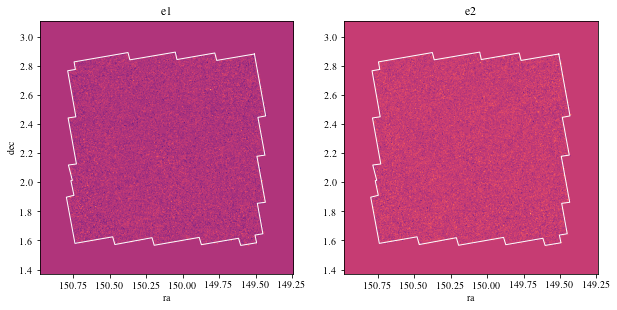

In [15]:
figure(figsize=[10,5])
subplot(121)
imshow(e1map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('ra')
ylabel('dec')
title('e1')

subplot(122)
imshow(e2map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('ra')
title('e2')

In [16]:
# Saving binned ellipticity maps
#fits.writeto('../../data/COSMOS/cosmos_full_e1_0.29arcmin{}.fits'.format(width), e1map.astype('float32'),
#            overwrite=True)
#fits.writeto('../../data/COSMOS/cosmos_full_e2_0.29arcmin{}.fits'.format(width), -e2map.astype('float32'),
#            overwrite=True)

## Create map of number of galaxies per pixel

In [17]:
n_gal_map_full = bin2d(cat_full['Ra'], cat_full['Dec'], 
                     npix=width,
                     extent=extent)

#fits.writeto('../../data/COSMOS/cosmos_full_ngal_0.29arcmin{}.fits'.format(width), n_gal_map_full.astype('float32'),
#            overwrite=True)

Text(0.5, 1.0, 'faint catalog')

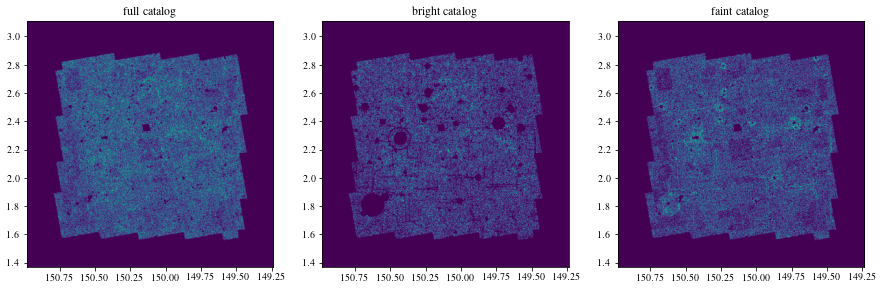

In [18]:
n_gal_map_bright = bin2d(cat_bright['Ra'], cat_bright['Dec'], 
                     npix=width,
                     extent=extent)

n_gal_map_faint = bin2d(cat_faint['Ra'], cat_faint['Dec'], 
                     npix=width,
                     extent=extent)

figure(figsize=[15,5])
subplot(131)
imshow(n_gal_map_full, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('full catalog')

subplot(132)
imshow(n_gal_map_bright, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('bright catalog')

subplot(133)
imshow(n_gal_map_faint, origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title('faint catalog')

Number of galaxies per arcmin^2

In [19]:
l = np.max(cat_full['Ra'])-np.min(cat_full['Ra'])
L = np.max(cat_full['Dec'])-np.min(cat_full['Dec'])
print(l)
print(L)
print(l*L)
print('n_gal / arcmin^2 =', len(cat_full['Ra'])/l/L/60/60)

1.3628894000000003
1.3236485630000001
1.8039865958379326
n_gal / arcmin^2 = 64.22765756721984


## Creat binary mask for empty pixels

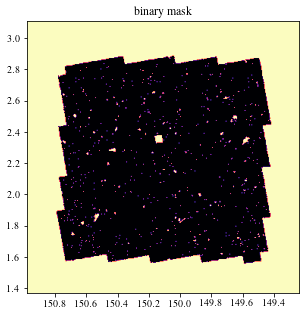

In [20]:
# Data mask
figure(figsize=[5,5])
m = n_gal_map_full == 0
imshow(m, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width))
xlim(gca().get_xlim()[::-1])
title("binary mask")

mask = 1.-m

#fits.writeto('../../data/COSMOS/cosmos_full_mask_0.29arcmin{}.fits'.format(width), (1.-m).astype('float32'),
#            overwrite=True)

##  Recover convergence via Kaiser-Squires inversion

In [21]:
# Performs a standard KS reconstruction
kappaE, kappaB = ks93(e1map, -e2map) 

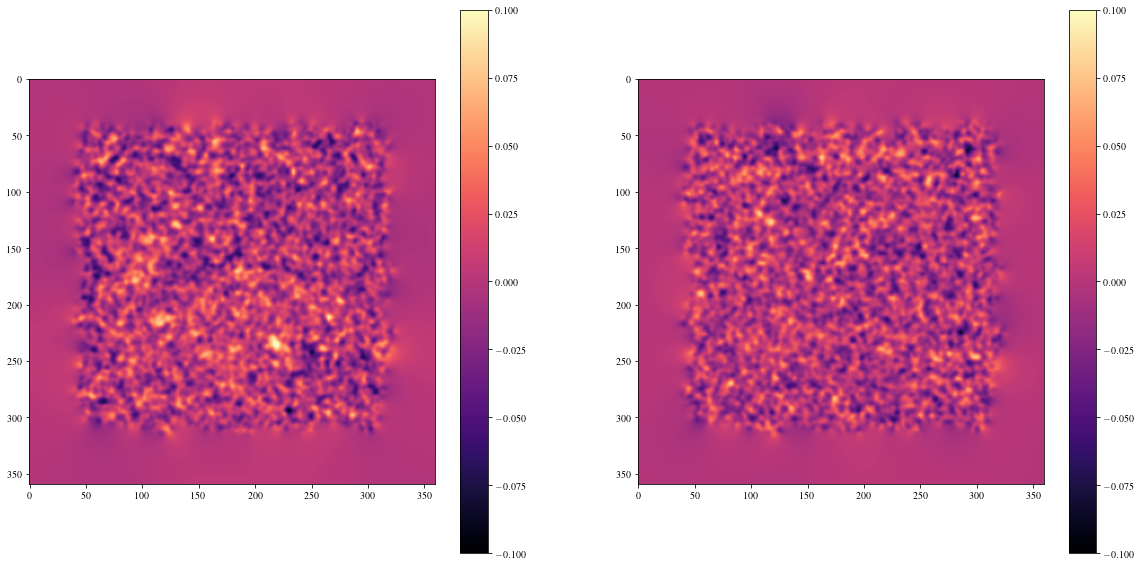

In [22]:
from scipy.ndimage import gaussian_filter
figure(figsize=[20,10])
subplot(121)
mappable = imshow(gaussian_filter(kappaE,2)[:,::-1], cmap='magma',vmax=0.1,vmin=-0.1);colorbar()
subplot(122)
mappable = imshow(gaussian_filter(kappaB,2)[:,::-1], cmap='magma',vmax=0.1,vmin=-0.1);colorbar()

# Redshift distribution of the full catalog

Be careful that the faint catalog has a x100 factor in its redshift distribution.

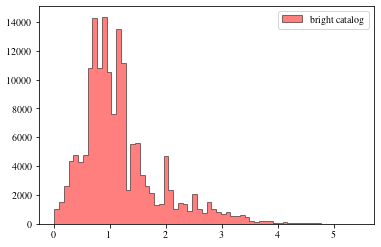

In [23]:
hist(cat_bright['zphot'], bins=64, color="red", alpha=0.5, ec="k", histtype='stepfilled',
     label='bright catalog');
legend()

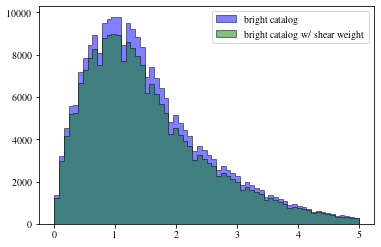

In [24]:
hist(nz_w0['col1'], weights=nz_w0['col2']/100, bins=64, color="blue", alpha=0.5, ec="k", histtype='stepfilled',
     label='bright catalog');

hist(nz_w1['col1'], weights=nz_w1['col2']/100, bins=64, color="green", alpha=0.5, ec="k", histtype='stepfilled',
     label='bright catalog w/ shear weight');
legend()

In [25]:
np.max(cat_bright['zphot'])

5.446

In [26]:
z = np.arange(0, 5.5, .01)

nz_bright = np.zeros(z.shape)
for z_gal in cat_bright['zphot']:
    nz_bright[int(np.ceil(z_gal*100))] += 1
    
nz_faint = np.zeros(z.shape)
nz_faint[0:500] = nz_w0['col2']/100

nz_faint_w = np.zeros(z.shape)
nz_faint_w[0:500] = nz_w1['col2']/100

nz_full = nz_faint + nz_bright
nz_full_w = nz_faint_w + nz_bright

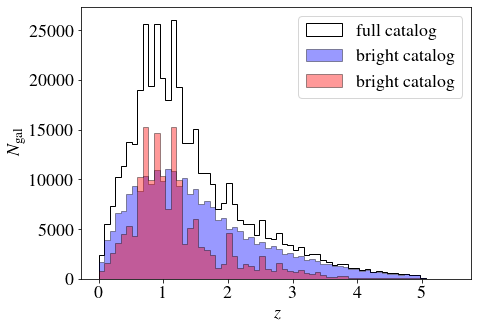

In [27]:
figure(figsize=(7,5))
hist(z, weights=nz_full, bins=64, color="white", alpha=1, ec="k", histtype='stepfilled',
     label='full catalog');
hist(z, weights=nz_faint, bins=64, color="blue", alpha=.4, ec="k", histtype='stepfilled',
     label='bright catalog');
hist(z, weights=nz_bright, bins=64, color="red", alpha=.4, ec="k", histtype='stepfilled',
     label='bright catalog');
legend(fontsize=18)
xlabel(r'$z$', fontsize=18)
ylabel(r'$N_\mathrm{gal}$', fontsize=18)
xticks(fontsize=18)
yticks(fontsize=18)
savefig('plots/redshift_distribution.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)

Let's export 3 files:

- `hist_z.npy`: the x axis of the full redshift histogram plotted above
- `hist_n_z.npy`: the corresponding y axis (n_z)
- `redshift_catalog.npy`: all the redshift values in the full catalog

In [28]:
#np.save("hist_z.npy", z)
#np.save("hist_n_z.npy", nz_full)
redshift_catalog = np.array([i/100 for (i,z) in enumerate(nz_full) for _ in range(int(np.round(z)))])
#np.save("redshift_catalog.npy", redshift_catalog)

## Computing theory power spectrum

In order to compute the Gaussian prior for our reconstruction, we need to compute the theory power spectrum for this given redshift distribution

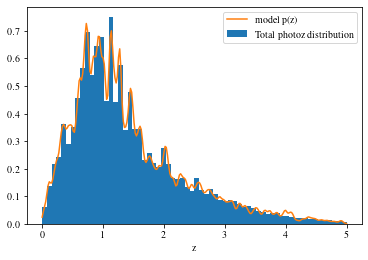

In [29]:
import jax
import jax_cosmo as jc
import jax.numpy as jnp

cosmo = jc.Planck15()

# Create model of the redshift distribution
np.random.shuffle(redshift_catalog)
pz = jc.redshift.kde_nz(jnp.array(redshift_catalog[:10000].astype('float32')),
                        jnp.ones(10000), bw=0.025)
z = jnp.linspace(0,5,256)

hist(redshift_catalog, 64,range=[0,5],density=True, label='Total photoz distribution');
plot(z, pz(z), label='model p(z)');
xlabel('z');
legend();

In [30]:
@jax.jit
def theory_cl(ell):
    """ Computes angular C_ell for our survey, at given ell
    """
    cosmo = jc.Planck15()
    tracer = jc.probes.WeakLensing([pz])
    return jc.angular_cl.angular_cl(cosmo, ell, [tracer])[0]

/linkhome/rech/genpuc01/utb76xl/.local/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:5794: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


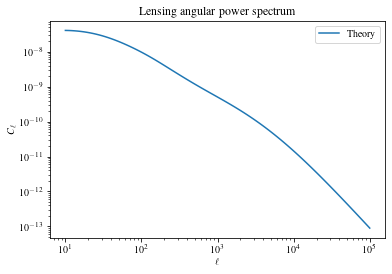

In [31]:
ell = jnp.logspace(1,5,100)
loglog(ell, theory_cl(ell), label='Theory');
xlabel('$\ell$')
ylabel('$C_\ell$')
title('Lensing angular power spectrum');
legend();

In [32]:
# Exporting power spectrum
ps = np.stack([ell, theory_cl(ell)], axis=0)
#fits.writeto('../../data/COSMOS/theory_cl.fits', ps.astype('float32'), overwrite=True)

In [33]:
# We can compare to our kTNG maps
from jax_lensing.utils import load_dataset_deepmass
dset = load_dataset_deepmass('kappatng', 32, 360, "90%")
batch = next(dset)

/linkhome/rech/genpuc01/utb76xl/.local/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:5794: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


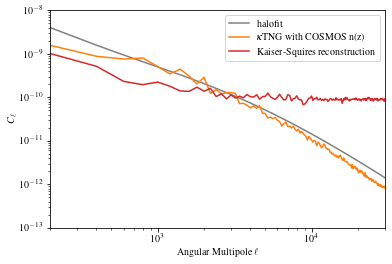

In [34]:
from jax_lensing.spectral import measure_power_spectrum

resolution = 0.3                             # Pixel resolution in arcmin/pixel
pixel_size = np.pi * resolution / 180. / 60. # Pixel resolution in rad/pixel

ell, ps = measure_power_spectrum(batch['x'][0,:,:,0], 
                                      pixel_size=pixel_size)

ell, ps_ks = measure_power_spectrum(kappaE, 
                                      pixel_size=pixel_size)
cl  = theory_cl(ell)

loglog(ell, cl,color='gray',label='halofit')
loglog(ell, ps, color='C1', label=r'$\kappa$TNG with COSMOS n(z)')
loglog(ell, ps_ks, color='C3', label='Kaiser-Squires reconstruction')

legend()
xlim(2e2,3e4)
ylim(1e-13,1e-8)
xlabel('Angular Multipole ${\ell}$');
ylabel('$C_{\ell}$');

We observe a lack of power on large scales in the KS map, wich is most likelily due to the large mask present on the data

## COSMOS noise realisation

Apply a random rotation to COSMOS ellpticities

In [35]:
from lenspack.shear import random_rotation

In [36]:
e1_cosmos = cat_full['e1iso_rot4_gr_snCal']
e2_cosmos = cat_full['e2iso_rot4_gr_snCal']

In [37]:
e1map, e2map = bin2d(cat_full['Ra'], cat_full['Dec'], 
                     v=(e1_cosmos, -e2_cosmos), 
                     w=cat_full['nhweight_int'],
                     npix=width,
                     extent=extent)

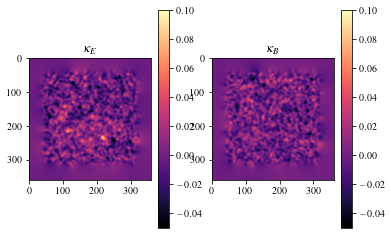

In [38]:
kwargs=dict(vmin=-.05, vmax=.1, cmap='magma')
kappaE, kappaB = ks93(e1map, e2map) # I think e2 is inverted...
subplot(121)
title(r'$\kappa_E$')
imshow(gaussian_filter(kappaE,3)[:,::-1], **kwargs);colorbar()
subplot(122)
title(r'$\kappa_B$')
imshow(gaussian_filter(kappaB,3)[:,::-1], **kwargs);colorbar()

In [39]:
# apply a random rotation to cancel the shear signal and get the noise realisation
e1_random, e2_random = random_rotation(e1_cosmos, e2_cosmos)

## Noise taking into account n_gal

In [40]:
denominator = n_gal_map_full.copy()
denominator = 1./np.sqrt(n_gal_map_full)

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/tensorflow-gpu-2.5.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [41]:
denominator *= mask
denominator = np.nan_to_num(denominator)

std1 = np.std(cat_full['e1iso_rot4_gr_snCal'])*denominator
std2 = np.std(cat_full['e2iso_rot4_gr_snCal'])*denominator
#fits.writeto('../../data/COSMOS/std1.fits', std1_)
#fits.writeto('../../data/COSMOS/std2.fits', std2)

noise_1 = std1 * np.random.randn(360,360)
noise_2 = std2 * np.random.randn(360,360)

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/tensorflow-gpu-2.5.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


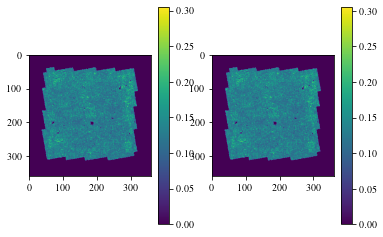

In [42]:
title('Noise standard deviation')
subplot(121)
imshow(std1)
colorbar()
subplot(122)
imshow(std2)
colorbar()